In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [39]:
# Load dataset
url = ("../data/tic-tac-toe.data")

columns = [
    "top_left", "top_middle", "top_right",
    "middle_left", "middle_middle", "middle_right",
    "bottom_left", "bottom_middle", "bottom_right",
    "class"
]

df = pd.read_csv(url, header=None, names=columns)

# Tampilkan 5 data pertama
df.head()

,top_left,top_middle,top_right,middle_left,middle_middle,middle_right,bottom_left,bottom_middle,bottom_right,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [40]:
# Informasi umum dataset
df.info()

# Ukuran dataset
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   top_left       958 non-null    object
 1   top_middle     958 non-null    object
 2   top_right      958 non-null    object
 3   middle_left    958 non-null    object
 4   middle_middle  958 non-null    object
 5   middle_right   958 non-null    object
 6   bottom_left    958 non-null    object
 7   bottom_middle  958 non-null    object
 8   bottom_right   958 non-null    object
 9   class          958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB
Jumlah baris: 958
Jumlah kolom: 10


In [41]:
# Melihat nilai unik tiap fitur
for col in df.columns:
    print(f"{col}:", df[col].unique())

top_left: ['x' 'o' 'b']
top_middle: ['x' 'o' 'b']
top_right: ['x' 'o' 'b']
middle_left: ['x' 'o' 'b']
middle_middle: ['o' 'b' 'x']
middle_right: ['o' 'b' 'x']
bottom_left: ['x' 'o' 'b']
bottom_middle: ['o' 'x' 'b']
bottom_right: ['o' 'x' 'b']
class: ['positive' 'negative']


In [42]:
# Missing values
df.isnull().sum()

top_left         0
top_middle       0
top_right        0
middle_left      0
middle_middle    0
middle_right     0
bottom_left      0
bottom_middle    0
bottom_right     0
class            0
dtype: int64

In [43]:
# Duplicate data
df.duplicated().sum()

np.int64(0)

In [44]:
# Distribusi kelas
df['class'].value_counts()

class
positive    626
negative    332
Name: count, dtype: int64

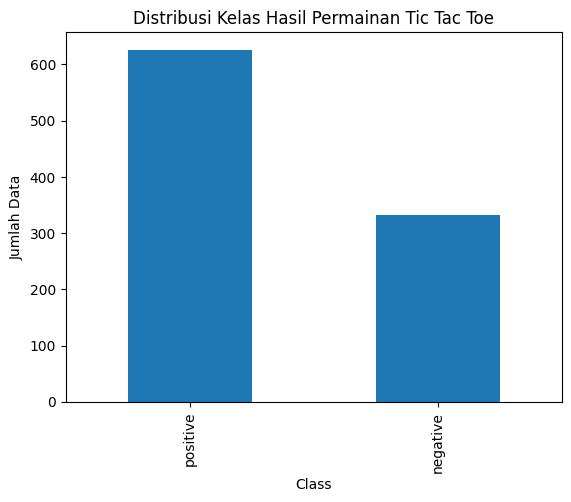

In [45]:
#@title Visualisasi 1 – Distribusi Kelas
plt.figure()
df['class'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas Hasil Permainan Tic Tac Toe")
plt.xlabel("Class")
plt.ylabel("Jumlah Data")
plt.show()

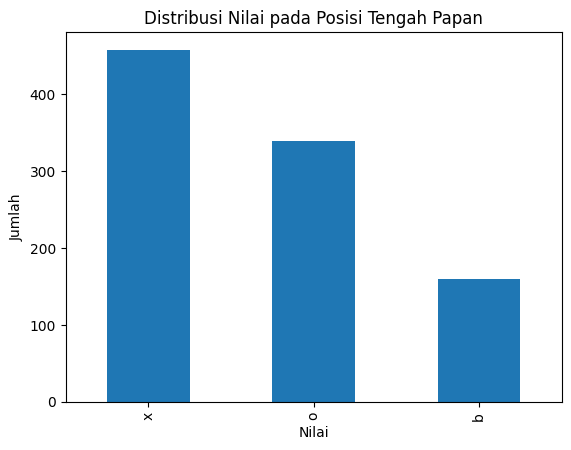

In [46]:
#@title Visualisasi 2 – Distribusi Nilai pada Satu Posisi Papan
plt.figure()
df['middle_middle'].value_counts().plot(kind='bar')
plt.title("Distribusi Nilai pada Posisi Tengah Papan")
plt.xlabel("Nilai")
plt.ylabel("Jumlah")
plt.show()


C:\Users\azzah\AppData\Local\Temp\ipykernel_13540\914485464.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace({'x': 1, 'o': -1, 'b': 0, 'positive': 1, 'negative': 0})


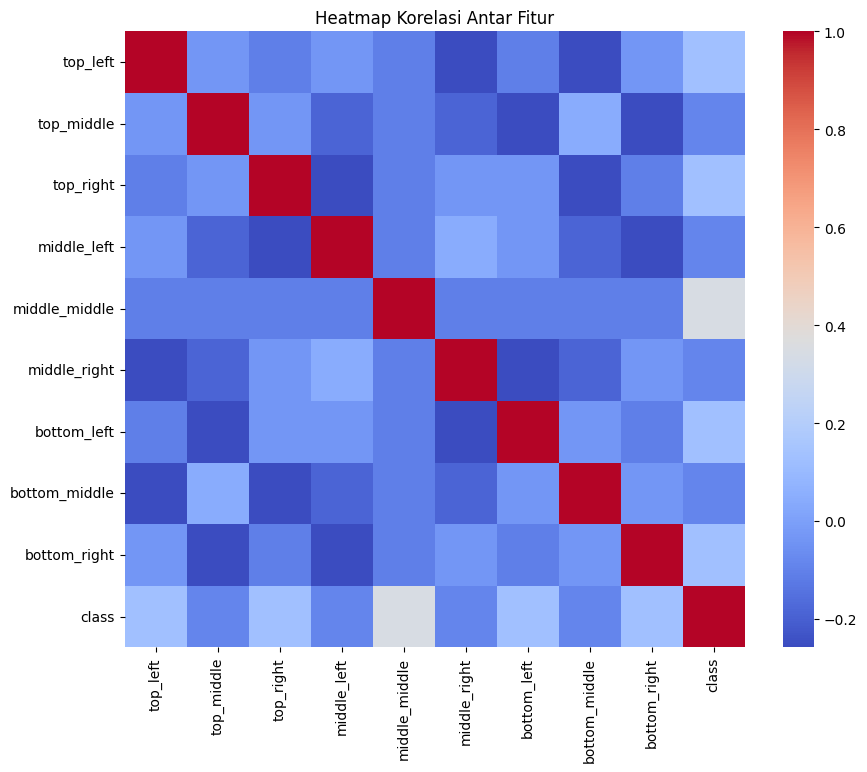

In [47]:
#@title Visualisasi 3 – Heatmap Korelasi (setelah encoding sementara)
# Encoding sederhana untuk visualisasi
df_encoded = df.replace({'x': 1, 'o': -1, 'b': 0, 'positive': 1, 'negative': 0})

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


In [48]:
# Pisahkan fitur dan target
X = df.drop('class', axis=1)
y = df['class']

In [49]:
# Label Encoding untuk setiap fitur
le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col])

In [50]:
# Encoding label target
y = LabelEncoder().fit_transform(y)
# positive -> 1, negative -> 0


In [51]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
#@title Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data training :", X_train.shape)
print("Data testing  :", X_test.shape)

Data training : (766, 9)
Data testing  : (192, 9)


In [53]:
#@title Data Balancing
# Distribusi kelas
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(265), np.int64(1): np.int64(501)}

In [54]:
#ringkasan data preparation
print("Data Preparation selesai")
print("Jumlah fitur:", X_train.shape[1])
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Data Preparation selesai
Jumlah fitur: 9
Jumlah data training: 766
Jumlah data testing: 192


In [55]:
#@title Model 1 — Baseline Model
from sklearn.linear_model import LogisticRegression
import joblib

model_baseline = LogisticRegression(
    C=1.0,
    max_iter=100,
    random_state=42
)

model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)

# Simpan model ke folder models
joblib.dump(model_baseline, "../models/model_baseline.pkl")

print("Model saved to models/model_baseline.pkl")


Model saved to models/model_baseline.pkl


In [56]:
#@title Model 2 — ML / Advanced Model
from sklearn.ensemble import RandomForestClassifier

model_advanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model_advanced.fit(X_train, y_train)
y_pred_advanced = model_advanced.predict(X_test)

# Simpan model ke folder models
joblib.dump(model_advanced, "../models/model_rf.pkl")

print("Model saved to models/model_rf.pkl")

Model saved to models/model_rf.pkl


In [57]:
#@title Model 3 — Deep Learning Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time

input_dim = X_train.shape[1]

model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_dl.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

history = model_dl.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

training_time = time.time() - start_time

#simpan model ke folder models
model_dl.save("../models/model_mlp.h5")
print("Model saved to models/model_mlp.h5")

Epoch 1/20


d:\KUMPULAN TUGAS DOSEN\Data Science\UAS_Dataset_TicTacToe\environment\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5784 - loss: 0.6726 - val_accuracy: 0.6364 - val_loss: 0.6493
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6634 - loss: 0.6348 - val_accuracy: 0.6364 - val_loss: 0.6441
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6618 - loss: 0.6297 - val_accuracy: 0.6364 - val_loss: 0.6400
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6552 - loss: 0.6293 - val_accuracy: 0.6364 - val_loss: 0.6374
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6634 - loss: 0.6198 - val_accuracy: 0.6364 - val_loss: 0.6366
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6683 - loss: 0.6209 - val_accuracy: 0.6364 - val_loss: 0.6343
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6716 - loss: 0.6162 - val_accuracy: 0.6364 - val_loss: 0.6319
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6716 - loss: 0.6137 - val_accuracy: 0.6558 - val_loss: 0.6292
E

Model saved to models/model_mlp.h5


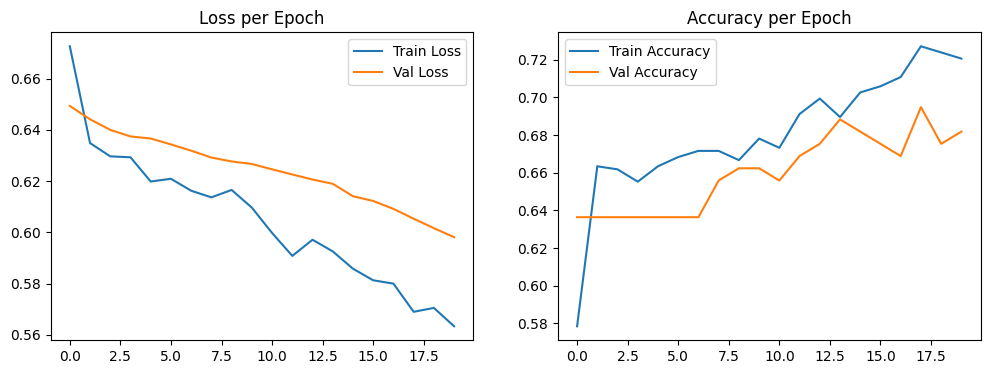

In [58]:
#training process
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.show()

In [59]:
model_dl.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

In [60]:
#@title Evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Model 1

In [61]:
# Metrik Evaluasi - model 1
acc_baseline = accuracy_score(y_test, y_pred_baseline)
prec_baseline = precision_score(y_test, y_pred_baseline)
rec_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

acc_baseline, prec_baseline, rec_baseline, f1_baseline

(0.671875, 0.691358024691358, 0.896, 0.7804878048780488)

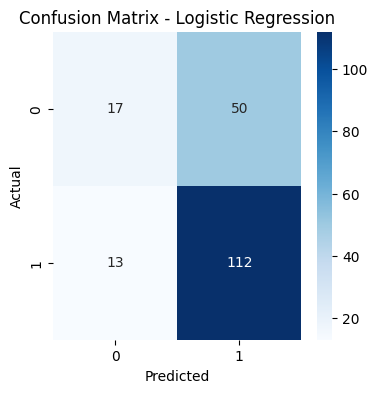

In [62]:
# Confusion Matrix - model 1
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(4,4))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model 2

In [63]:
# Metrik Evaluasi - model 2
acc_adv = accuracy_score(y_test, y_pred_advanced)
prec_adv = precision_score(y_test, y_pred_advanced)
rec_adv = recall_score(y_test, y_pred_advanced)
f1_adv = f1_score(y_test, y_pred_advanced)

acc_adv, prec_adv, rec_adv, f1_adv


(0.9479166666666666, 0.9259259259259259, 1.0, 0.9615384615384616)

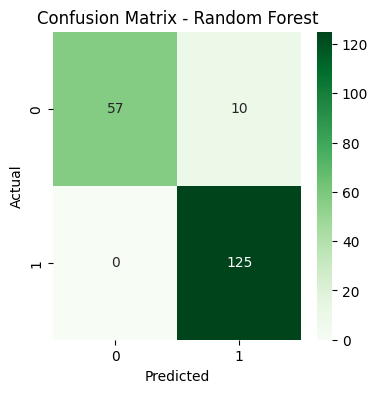

In [64]:
# Confusion Matrix - model 2
cm_adv = confusion_matrix(y_test, y_pred_advanced)

plt.figure(figsize=(4,4))
sns.heatmap(cm_adv, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

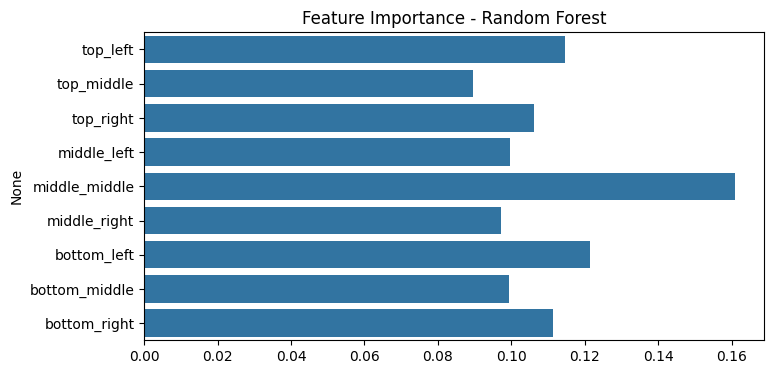

In [65]:
# Feature Importance - model 2
importances = model_advanced.feature_importances_
features = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

# Model 3

In [66]:
#Prediksi pada Test Set - model 3
y_pred_dl_prob = model_dl.predict(X_test)
y_pred_dl = (y_pred_dl_prob > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [67]:
# Metrik Evaluasi
acc_dl = accuracy_score(y_test, y_pred_dl)
prec_dl = precision_score(y_test, y_pred_dl)
rec_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)

acc_dl, prec_dl, rec_dl, f1_dl

(0.7239583333333334, 0.711764705882353, 0.968, 0.8203389830508474)

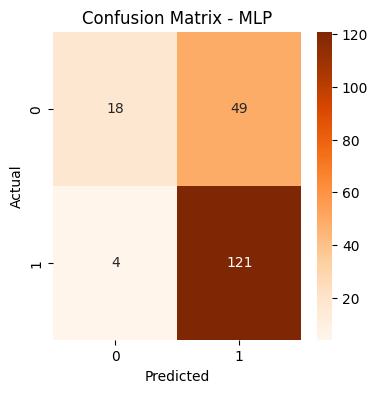

In [68]:
# Confusion Matrix
cm_dl = confusion_matrix(y_test, y_pred_dl)

plt.figure(figsize=(4,4))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

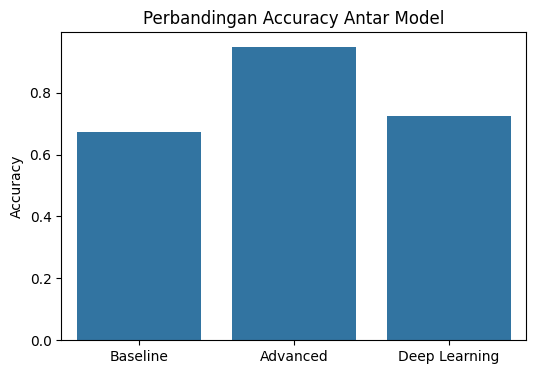

In [69]:
models = ['Baseline', 'Advanced', 'Deep Learning']
accuracy = [acc_baseline, acc_adv, acc_dl]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracy)
plt.title("Perbandingan Accuracy Antar Model")
plt.ylabel("Accuracy")
plt.show()
